# Setup Dependencies for Notebook use

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import seaborn as sn
import gmaps
import os
import json
import time

# Import API key
import config

# Configure gmaps
gkey = config.gkey
gmaps.configure(api_key=gkey)

# Data Extraction - Setting relative path | Importing csv files in directory | Reading in with Pandas

In [2]:
notebook_path = os.getcwd()
parent_dir = notebook_path[0:-4]

In [3]:
dataset_filelist = ["1_county_level_confirmed_cases.csv","2_cases_and_deaths_by_county_timeseries.csv","weekly-claims-by-county-twc.csv","texas_county_med_income.csv"]
for csv in dataset_filelist:   
    for root, dirs, files in os.walk(parent_dir):
        if csv in files:
            if csv == dataset_filelist[0]:
                covid_dataset1 = (os.path.join(root, csv))
            elif csv == dataset_filelist[1]:
               covid_dataset2 =  (os.path.join(root, csv))
            elif csv == dataset_filelist[2]:
               unemployment_dataset =  (os.path.join(root, csv))
            else:
                texas_median_income = (os.path.join(root, csv))

In [4]:
ConfirmedByCounty_Covid = pd.read_csv('https://query.data.world/s/tmtcsyi5cadisfgsziloo4c7sesaon') # Dataset covid_dataset1 can be used as a subsuite for live data grab. limited by date of csv download
CaseDeathsBy_County_timeseries = pd.read_csv('https://query.data.world/s/ipaqguramdyfp27ppx72n3sgtkj6xu', parse_dates=['date']) # Dataset covid_dataset2 can be used as a subsuite for live data grab. limited by date of csv download
unemployment_dataset = pd.read_csv(unemployment_dataset)
texas_median_income = pd.read_csv(texas_median_income)

#  Initial Data Review - Take a look at data in raw form after loading with Pandas

In [5]:
# Covid-19 cases by county as of date in last_update column - Overall Confirms and Deaths
ConfirmedByCounty_Covid.head()

,last_update,location_type,state,county_name,county_name_long,fips_code,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
0,2020-11-21 14:25:36 UTC,county,Alabama,Autauga,"Autauga, Alabama, US",1001.0,32.539527,-86.644082,Medium metro,55200.0,2597,4704.71,39,70.65
1,2020-11-21 14:25:36 UTC,county,Alabama,Baldwin,"Baldwin, Alabama, US",1003.0,30.727750,-87.722071,Small metro,208107.0,8131,3907.12,84,40.36
2,2020-11-21 14:25:36 UTC,county,Alabama,Barbour,"Barbour, Alabama, US",1005.0,31.868263,-85.387129,Non-core,25782.0,1157,4487.63,10,38.79
3,2020-11-21 14:25:36 UTC,county,Alabama,Bibb,"Bibb, Alabama, US",1007.0,32.996421,-87.125115,Large fringe metro,22527.0,1036,4598.93,17,75.46
4,2020-11-21 14:25:36 UTC,county,Alabama,Blount,"Blount, Alabama, US",1009.0,33.982109,-86.567906,Large fringe metro,57645.0,2735,4744.56,36,62.45


In [6]:
# Covid-19 cases by county timeseries cumulative outlook, start of pandemic to as of pull date
CaseDeathsBy_County_timeseries.head()

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_7_day_rolling_avg,new_deaths_7_day_rolling_avg
0,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-22,18181.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-23,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-24,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-25,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,63072001,county,72001.0,Adjuntas,Puerto Rico,2020-01-26,18181.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [7]:
# Texas county unemployment data timeseries - Data starts in march
unemployment_dataset.head()

,County,11/7/2020,10/31/2020,10/24/2020,10/17/2020,10/10/2020,10/3/2020,9/26/2020,9/19/2020,9/12/2020,...,5/9/2020,5/2/2020,4/25/2020,4/18/2020,4/11/2020,4/4/2020,3/28/2020,3/21/2020,3/14/2020,3/7/2020
0,Anderson,51.0,42.0,79.0,54.0,63.0,64.0,64.0,61.0,66.0,...,153.0,181.0,176.0,183.0,205.0,252.0,180.0,101.0,18.0,20.0
1,Andrews,12.0,17.0,17.0,17.0,30.0,25.0,21.0,18.0,32.0,...,96.0,117.0,133.0,143.0,165.0,143.0,95.0,50.0,16.0,1.0
2,Angelina,83.0,77.0,89.0,80.0,98.0,103.0,100.0,119.0,107.0,...,273.0,463.0,388.0,449.0,495.0,689.0,452.0,227.0,37.0,37.0
3,Aransas,20.0,32.0,22.0,40.0,18.0,26.0,35.0,25.0,31.0,...,92.0,154.0,109.0,160.0,155.0,230.0,217.0,70.0,10.0,9.0
4,Archer,5.0,3.0,6.0,5.0,10.0,6.0,5.0,4.0,5.0,...,20.0,32.0,24.0,41.0,34.0,58.0,42.0,20.0,1.0,2.0


In [8]:
# Data set of median household income by Texas counties - Data source: U.S. Census Bureau. Small Area Income & Poverty Estimates. (2019)
texas_median_income.head()

,County,Median Household Income
0,Anderson,"$45,969"
1,Andrews,"$84,946"
2,Angelina,"$46,653"
3,Aransas,"$46,912"
4,Archer,"$61,190"


# Data Cleansing - Removing unused data, correcting data types, getting rid of Incorrect or invalid data, etc...

## Let's clean Texas Median Income

In [9]:
texas_median_income['Median Household Income'] = texas_median_income['Median Household Income'].str.replace('$','').str.replace(',','').astype(float)

In [10]:
# Display cleaned DataFrame
texas_median_income.head()

,County,Median Household Income
0,Anderson,45969.0
1,Andrews,84946.0
2,Angelina,46653.0
3,Aransas,46912.0
4,Archer,61190.0


In [11]:
# Get preliminary statistical outlook 
texas_median_income.describe()

,Median Household Income
count,254.000000
mean,51302.248031
std,12220.163942
min,30076.000000
25%,43253.750000
50%,48541.500000
75%,56199.250000
max,102858.000000


## Let's clean our first Covid-19 dataset. These are up-to-date cases with confirmed cases and deaths as of the last_update column.

In [12]:
Texas_ConfirmedByCounty_Covid = ConfirmedByCounty_Covid.loc[ConfirmedByCounty_Covid['state'] == 'Texas'].dropna(subset=['lat','lon'])
Texas_ConfirmedByCounty_Covid = Texas_ConfirmedByCounty_Covid.drop(columns=["location_type","state","county_name_long","fips_code"])

In [13]:
# Display cleaned DataFrame
Texas_ConfirmedByCounty_Covid.head()

,last_update,county_name,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
2599,2020-11-21 14:25:36 UTC,Anderson,31.815347,-95.653548,Micropolitan,57863.0,3092,5343.66,46,79.50
2600,2020-11-21 14:25:36 UTC,Andrews,32.304686,-102.637655,Micropolitan,17818.0,940,5275.56,13,72.96
2601,2020-11-21 14:25:36 UTC,Angelina,31.254573,-94.609015,Micropolitan,87607.0,2515,2870.78,97,110.72
2602,2020-11-21 14:25:36 UTC,Aransas,28.105562,-96.999505,Medium metro,24763.0,376,1518.39,18,72.69
2603,2020-11-21 14:25:36 UTC,Archer,33.615700,-98.687546,Small metro,8789.0,227,2582.77,2,22.76


In [14]:
# Get preliminary statistical outlook 
Texas_ConfirmedByCounty_Covid.describe()

,lat,lon,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
count,254.000000,254.000000,2.540000e+02,254.000000,254.000000,254.000000,254.000000
mean,31.660643,-98.653069,1.097842e+05,4399.586614,3551.893346,81.696850,94.224803
std,2.173436,2.670036,3.963104e+05,16471.674317,1875.402275,280.789891,66.695868
min,26.145242,-106.236327,1.020000e+02,1.000000,438.600000,0.000000,0.000000
25%,30.126978,-100.778688,7.099750e+03,200.750000,2282.880000,6.000000,50.382500
50%,31.783209,-98.543035,1.858450e+04,581.000000,3040.755000,15.000000,77.720000
75%,33.177285,-96.573857,4.987325e+04,1692.500000,4562.405000,46.750000,122.322500
max,36.278291,-93.744088,4.602523e+06,179911.000000,11209.520000,2954.000000,348.190000


## Next we'll clean-up our Covid-19 data timeseries that focuses on deaths and cases that are calculated cumulatively over time 

In [15]:
columns_todrop = []
Texas_CaseDeathsBy_County_timeseries = CaseDeathsBy_County_timeseries.loc[(CaseDeathsBy_County_timeseries['state'] == 'Texas') & (CaseDeathsBy_County_timeseries['location_name'] != 'Unassigned') & (CaseDeathsBy_County_timeseries['location_name'] != 'Out of TX')]
Texas_CaseDeathsBy_County_timeseries = Texas_CaseDeathsBy_County_timeseries.loc[Texas_CaseDeathsBy_County_timeseries['date'] >= '2020-03-01']
for column in Texas_CaseDeathsBy_County_timeseries.columns:
    if column.startswith('new'):
        columns_todrop.append(column)
for drop in columns_todrop:
    Texas_CaseDeathsBy_County_timeseries = Texas_CaseDeathsBy_County_timeseries.drop(columns=drop)

# Drop all other unused columns

Texas_CaseDeathsBy_County_timeseries = Texas_CaseDeathsBy_County_timeseries.drop(columns=["uid","location_type","state"]).set_index('date')

In [16]:
# Display cleaned DataFrame
Texas_CaseDeathsBy_County_timeseries.head()

,fips_code,location_name,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000
date,,,,,,,
2020-03-01,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-02,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-03,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-04,48001.0,Anderson,57863.0,0,0.0,0,0.0
2020-03-05,48001.0,Anderson,57863.0,0,0.0,0,0.0


In [17]:
# Get preliminary statistical outlook 
Texas_CaseDeathsBy_County_timeseries.describe()

,fips_code,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000
count,67310.000000,6.731000e+04,67310.000000,67310.000000,67310.000000,67310.000000
mean,48254.000000,1.097842e+05,1471.421676,1074.600559,28.899926,27.852054
std,146.646921,3.955325e+05,7934.315660,1403.398343,152.073064,45.798421
min,48001.000000,1.020000e+02,0.000000,0.000000,0.000000,0.000000
25%,48127.000000,7.092000e+03,4.000000,31.560000,0.000000,0.000000
50%,48254.000000,1.858450e+04,65.000000,451.260000,1.000000,5.150000
75%,48381.000000,4.998700e+04,426.000000,1680.370000,10.000000,39.540000
max,48507.000000,4.602523e+06,179911.000000,11209.520000,2954.000000,348.190000


## Create a subset of Covid-19 Timeseries that only has results for End of Month rows

In [18]:
endofmonth_Covid_timeseries = Texas_CaseDeathsBy_County_timeseries[(Texas_CaseDeathsBy_County_timeseries.index + pd.Timedelta(days=1)).day == 1]
current_month_Covid_timeseries = Texas_CaseDeathsBy_County_timeseries.loc['2020-11-11']
endofmonth_Covid_timeseries = endofmonth_Covid_timeseries.append(current_month_Covid_timeseries)

In [19]:
# Display new DataFrame showing filtered resultset
endofmonth_Covid_timeseries.head()

,fips_code,location_name,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000
date,,,,,,,
2020-03-31,48001.0,Anderson,57863.0,1,1.73,0,0.00
2020-04-30,48001.0,Anderson,57863.0,29,50.12,0,0.00
2020-05-31,48001.0,Anderson,57863.0,72,124.43,0,0.00
2020-06-30,48001.0,Anderson,57863.0,1032,1783.52,2,3.46
2020-07-31,48001.0,Anderson,57863.0,2196,3795.17,8,13.83


### Cleaning up unemployment dataset and manipulating data as needed

In [20]:
unemployment_claims = unemployment_dataset.copy()
unemployment_claims = unemployment_claims.transpose()
unemployment_claims = unemployment_claims.fillna(0)

unemployment_claims.columns = [''] * len(unemployment_claims.columns)
unemployment_header = unemployment_claims.iloc[0]
unemployment_claims = unemployment_claims[1:]
unemployment_claims.columns = unemployment_header
unemployment_claims.index.names = ['Date']
unemployment_claims.columns.names = ['']

unemployment_claims.index = pd.to_datetime(unemployment_claims.index)

In [21]:
unemployment_claims.head()

,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,...,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07,51,12,83,20,5,0,57,29,12,18,...,26,455,32,11,52,39,8,12,19,21
2020-10-31,42,17,77,32,3,1,46,28,3,23,...,24,422,28,7,74,31,14,16,20,11
2020-10-24,79,17,89,22,6,0,36,23,1,13,...,51,409,34,8,65,33,8,17,27,18
2020-10-17,54,17,80,40,5,1,35,26,4,24,...,43,434,30,15,45,26,6,17,27,12
2020-10-10,63,30,98,18,10,2,40,32,3,11,...,24,484,41,11,57,38,6,19,22,16


In [22]:
unemployment_claims.describe()

,Anderson,Andrews,Angelina,Aransas,Archer,Armstrong,Atascosa,Austin,Bailey,Bandera,...,Willacy,Williamson,Wilson,Winkler,Wise,Wood,Yoakum,Young,Zapata,Zavala
count,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,...,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0
unique,34.0,32.0,35.0,32.0,22.0,8.0,34.0,34.0,12.0,29.0,...,31.0,35.0,33.0,26.0,34.0,34.0,25.0,29.0,29.0,24.0
top,64.0,17.0,37.0,63.0,5.0,2.0,96.0,29.0,3.0,18.0,...,29.0,678.0,41.0,8.0,59.0,89.0,13.0,18.0,7.0,21.0
freq,2.0,3.0,2.0,2.0,5.0,8.0,2.0,2.0,8.0,3.0,...,2.0,2.0,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0


# Data Wrangling - Recalculating and storing needed values | Further Reshaping and transformation needed for secondary subsets | Merges

In [23]:
# Using the endofmonth_Covid_timeseries DF Calculate Distinct EOM numbers for each month outside of the cumulative numbers
date_list = endofmonth_Covid_timeseries.index.unique()
cumulative_numbers = []
cumulative_numbers.append(endofmonth_Covid_timeseries.loc['2020-03-31']['cumulative_cases'].sum())
for d in range(len(date_list)-1):
    cumulative_numbers.append((endofmonth_Covid_timeseries.loc[date_list[d+1]]['cumulative_cases'].sum()) - (endofmonth_Covid_timeseries.loc[date_list[d]]['cumulative_cases'].sum()))
print(cumulative_numbers)

[3809, 24918, 35925, 98408, 275233, 194446, 140280, 159242, 90075]


## HUD - Median Household Incomes(Family of 4) - Incomes over 57K

In [80]:
texas_income_above57k = texas_median_income.loc[(texas_median_income['Median Household Income'] > 57000)]
texas_income_above57k.head()

,County,Median Household Income
1,Andrews,84946.0
4,Archer,61190.0
5,Armstrong,57210.0
7,Austin,59942.0
10,Bastrop,61883.0


## Incomes that qualify as low imcome per HUD data. Less than or equal to 57K but greater than 36K

In [81]:
texas_low_income = texas_median_income.loc[(texas_median_income['Median Household Income'] <= 57000) & (texas_median_income['Median Household Income'] > 36000)]
texas_low_income.head()

,County,Median Household Income
0,Anderson,45969.0
2,Angelina,46653.0
3,Aransas,46912.0
6,Atascosa,50594.0
8,Bailey,45051.0


## Incomes that qualify as very low imcome per HUD data. Less than or equal to 36K but greater than 26K

In [82]:
texas_verylow_income = texas_median_income.loc[(texas_median_income['Median Household Income'] <= 36000) & (texas_median_income['Median Household Income'] > 26000)]
texas_verylow_income.head()

,County,Median Household Income
23,Brooks,30116.0
65,Duval,35156.0
95,Hall,32597.0
161,Maverick,35594.0
163,Menard,35881.0


## Some more transforming and Wrangling of unemployment data

In [27]:
# claims_data_merged, reshaped, and some clean-up
claims_data_merged_above57k = unemployment_dataset.merge(texas_income_above57k, left_on='County', right_on='County')
claims_data_merged_low = unemployment_dataset.merge(texas_low_income, left_on='County', right_on='County')
claims_data_merged_very_low = unemployment_dataset.merge(texas_verylow_income, left_on='County', right_on='County')

claims_data_merged_above57k = claims_data_merged_above57k.drop(columns=['Median Household Income'])
claims_data_merged_low = claims_data_merged_low.drop(columns=['Median Household Income'])
claims_data_merged_very_low = claims_data_merged_very_low.drop(columns=['Median Household Income'])

claims_data_merged_above57k = claims_data_merged_above57k.transpose()
claims_data_merged_above57k = claims_data_merged_above57k.fillna(0)

claims_data_merged_low = claims_data_merged_low.transpose()
claims_data_merged_low = claims_data_merged_low.fillna(0)

claims_data_merged_very_low = claims_data_merged_very_low.transpose()
claims_data_merged_very_low = claims_data_merged_very_low.fillna(0)

In [28]:
# Reshape both DFs bring the counties up to the column level and re-indexing 
claims_data_merged_above57k.columns = [''] * len(claims_data_merged_above57k.columns)
claims_data_merged_header = claims_data_merged_above57k.iloc[0]
claims_data_merged_above57k = claims_data_merged_above57k[1:]
claims_data_merged_above57k.columns = claims_data_merged_header
claims_data_merged_above57k.index.names = ['Date']
claims_data_merged_above57k.columns.names = ['']

claims_data_merged_low.columns = [''] * len(claims_data_merged_low.columns)
claims_data_merged_header = claims_data_merged_low.iloc[0]
claims_data_merged_low = claims_data_merged_low[1:]
claims_data_merged_low.columns = claims_data_merged_header
claims_data_merged_low.index.names = ['Date']
claims_data_merged_low.columns.names = ['']

claims_data_merged_very_low.columns = [''] * len(claims_data_merged_very_low.columns)
claims_data_merged_very_low_header = claims_data_merged_very_low.iloc[0]
claims_data_merged_very_low = claims_data_merged_very_low[1:]
claims_data_merged_very_low.columns = claims_data_merged_very_low_header
claims_data_merged_very_low.index.names = ['Date']
claims_data_merged_very_low.columns.names = ['']

In [29]:
# Transform index into a datetime format for later manipulation
claims_data_merged_above57k.index = pd.to_datetime(claims_data_merged_above57k.index)
claims_data_merged_low.index = pd.to_datetime(claims_data_merged_low.index)
claims_data_merged_very_low.index = pd.to_datetime(claims_data_merged_very_low.index)

In [30]:
claims_data_merged_above57k.head()

,Andrews,Archer,Armstrong,Austin,Bastrop,Blanco,Borden,Brazoria,Carson,Chambers,...,Sherman,Somervell,Sterling,Tarrant,Travis,Waller,Williamson,Wilson,Wise,Yoakum
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07,12,5,0,29,54,2,0,455,0,76,...,2,8,0,2279,1026,40,455,32,52,8
2020-10-31,17,3,1,28,75,4,0,429,2,73,...,2,4,2,2327,997,55,422,28,74,14
2020-10-24,17,6,0,23,81,2,0,456,2,59,...,1,5,3,2342,1055,49,409,34,65,8
2020-10-17,17,5,1,26,77,6,0,435,4,63,...,2,5,3,2296,1208,47,434,30,45,6
2020-10-10,30,10,2,32,70,7,0,531,7,71,...,2,10,2,2923,1234,64,484,41,57,6


In [31]:
# Display merged claims data for low income category
claims_data_merged_low.head()

,Anderson,Angelina,Aransas,Atascosa,Bailey,Bandera,Baylor,Bee,Bell,Bexar,...,Ward,Washington,Webb,Wharton,Wheeler,Wichita,Wilbarger,Winkler,Wood,Young
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07,51,83,20,57,12,18,2,34,428,1952,...,24,33,241,36,9,159,20,11,39,12
2020-10-31,42,77,32,46,3,23,5,20,408,2002,...,14,30,248,36,3,151,11,7,31,16
2020-10-24,79,89,22,36,1,13,2,24,359,1842,...,17,24,246,49,4,159,18,8,33,17
2020-10-17,54,80,40,35,4,24,2,19,364,1766,...,23,34,248,41,9,156,22,15,26,17
2020-10-10,63,98,18,40,3,11,3,41,436,2319,...,19,37,318,38,10,176,24,11,38,19


In [32]:
# Display merged claims data for very low income category
claims_data_merged_very_low.head()

,Brooks,Duval,Hall,Maverick,Menard,Starr,Willacy,Zapata,Zavala
Date,,,,,,,,,
2020-11-07,7,21,2,138,2,178,26,19,21
2020-10-31,9,10,2,241,1,124,24,20,11
2020-10-24,8,16,1,111,2,152,51,27,18
2020-10-17,13,9,4,100,0,143,43,27,12
2020-10-10,12,19,3,99,1,139,24,22,16


In [33]:
endofmonth_Covid_timeseries_lowincome = endofmonth_Covid_timeseries.rename(columns={"location_name":"County"})
endofmonth_Covid_timeseries_lowincome = endofmonth_Covid_timeseries_lowincome.reset_index()
combined_low_income_covidcases = pd.merge(endofmonth_Covid_timeseries_lowincome, texas_low_income, on='County').set_index('date')
combined_low_income_covidcases = combined_low_income_covidcases.dropna(how='any')
combined_low_income_covidcases

,fips_code,County,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,Median Household Income
date,,,,,,,,
2020-03-31,48001.0,Anderson,57863.0,1,1.73,0,0.00,45969.0
2020-04-30,48001.0,Anderson,57863.0,29,50.12,0,0.00,45969.0
2020-05-31,48001.0,Anderson,57863.0,72,124.43,0,0.00,45969.0
2020-06-30,48001.0,Anderson,57863.0,1032,1783.52,2,3.46,45969.0
2020-07-31,48001.0,Anderson,57863.0,2196,3795.17,8,13.83,45969.0
...,...,...,...,...,...,...,...,...
2020-07-31,48503.0,Young,18114.0,133,734.24,3,16.56,49301.0
2020-08-31,48503.0,Young,18114.0,244,1347.02,6,33.12,49301.0
2020-09-30,48503.0,Young,18114.0,332,1832.84,6,33.12,49301.0


In [34]:
endofmonth_Covid_timeseries_verylowincome = endofmonth_Covid_timeseries.rename(columns={"location_name":"County"})
endofmonth_Covid_timeseries_verylowincome = endofmonth_Covid_timeseries_verylowincome.reset_index()
combined_very_low_income_covidcases = pd.merge(endofmonth_Covid_timeseries_verylowincome, texas_verylow_income, on='County').set_index('date')
combined_very_low_income_covidcases = combined_very_low_income_covidcases.dropna(how='any')
combined_very_low_income_covidcases.head()

,fips_code,County,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,Median Household Income
date,,,,,,,,
2020-03-31,48047.0,Brooks,7180.0,0,0.00,0,0.00,30116.0
2020-04-30,48047.0,Brooks,7180.0,1,13.93,0,0.00,30116.0
2020-05-31,48047.0,Brooks,7180.0,1,13.93,0,0.00,30116.0
2020-06-30,48047.0,Brooks,7180.0,3,41.78,0,0.00,30116.0
2020-07-31,48047.0,Brooks,7180.0,84,1169.92,1,13.93,30116.0


In [35]:
endofmonth_Covid_timeseries_above57kincome = endofmonth_Covid_timeseries.rename(columns={"location_name":"County"})
endofmonth_Covid_timeseries_above57kincome = endofmonth_Covid_timeseries_above57kincome.reset_index()
combined_above57k_income_covidcases = pd.merge(endofmonth_Covid_timeseries_above57kincome, texas_income_above57k, on='County').set_index('date')
combined_above57k_income_covidcases = combined_above57k_income_covidcases.dropna(how='any')
combined_above57k_income_covidcases

,fips_code,County,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,Median Household Income
date,,,,,,,,
2020-03-31,48003.0,Andrews,17818.0,0,0.00,0,0.00,84946.0
2020-04-30,48003.0,Andrews,17818.0,19,106.63,0,0.00,84946.0
2020-05-31,48003.0,Andrews,17818.0,27,151.53,0,0.00,84946.0
2020-06-30,48003.0,Andrews,17818.0,75,420.92,0,0.00,84946.0
2020-07-31,48003.0,Andrews,17818.0,255,1431.14,6,33.67,84946.0
...,...,...,...,...,...,...,...,...
2020-07-31,48501.0,Yoakum,8571.0,77,898.38,1,11.67,61560.0
2020-08-31,48501.0,Yoakum,8571.0,145,1691.75,4,46.67,61560.0
2020-09-30,48501.0,Yoakum,8571.0,224,2613.46,5,58.34,61560.0


# Analysis - DataFrame calculations and Graph plotting

### Setting up claims data for calculations and plotting using resampling and matplotlib

In [36]:
unemployment_claims_monthly = unemployment_claims.resample('M').sum()
unemployment_claims_monthly_by_county = unemployment_claims_monthly.sum(axis=0) 

claims_monthly_totals = unemployment_claims_monthly.sum(axis=1)
total_claims_per_month_df = pd.DataFrame()

In [37]:
above_lowincome_claims_monthly = claims_data_merged_above57k.resample('M').sum()
low_income_claims_monthly = claims_data_merged_low.resample('M').sum()
very_low_income_claims_monthly = claims_data_merged_very_low.resample('M').sum()

In [38]:
low_income_claims_monthly_sum  = low_income_claims_monthly.sum(axis=1) 
above_lowincome_claims_monthly_sum = above_lowincome_claims_monthly.sum(axis=1)
very_low_income_claims_monthly_sum  = very_low_income_claims_monthly.sum(axis=1) 

total_claims_per_month_df['Claims per Month Above Low Income'] = above_lowincome_claims_monthly_sum
total_claims_per_month_df['Claims per Month Low Income'] = low_income_claims_monthly_sum
total_claims_per_month_df['Claims per Month Very Low Income'] = very_low_income_claims_monthly_sum

total_claims_per_month_df.head() #Display total claims data

,Claims per Month Above Low Income,Claims per Month Low Income,Claims per Month Very Low Income
Date,,,
2020-03-31,305903.0,139761.0,2175.0
2020-04-30,564877.0,273291.0,4652.0
2020-05-31,386642.0,198815.0,5546.0
2020-06-30,204972.0,110807.0,3158.0
2020-07-31,201863.0,118853.0,2933.0


In [39]:
date = total_claims_per_month_df.index.month_name().str.slice(stop=3)

In [40]:
# Covid cases to be used for plotting
cumulative_numbers_df = pd.DataFrame(cumulative_numbers,index=date)
cumulative_numbers_df.columns = ['Numbers']
cumulative_numbers_df.head()

,Numbers
Date,
Mar,3809
Apr,24918
May,35925
Jun,98408
Jul,275233


## Area Chart on Claims Percentages by Income Category

In [41]:
area_chart_claims_df = total_claims_per_month_df.copy()
area_chart_claims_df['Total'] = area_chart_claims_df.iloc[:,-4: -1].sum(axis=1)

In [42]:
area_chart_claims_groupby_df = total_claims_per_month_df.copy()
area_chart_claims_df['above57k_percentage'] = area_chart_claims_df['Claims per Month Above Low Income'] / area_chart_claims_df['Total']
area_chart_claims_df['low_income_percentage'] = area_chart_claims_df['Claims per Month Low Income'] / area_chart_claims_df['Total']
area_chart_claims_df['verylow_income_percentage'] = area_chart_claims_df['Claims per Month Very Low Income'] / area_chart_claims_df['Total']
area_chart_claims_df 

,Claims per Month Above Low Income,Claims per Month Low Income,Claims per Month Very Low Income,Total,above57k_percentage,low_income_percentage,verylow_income_percentage
Date,,,,,,,
2020-03-31,305903.0,139761.0,2175.0,445664.0,0.686398,0.313602,0.004880
2020-04-30,564877.0,273291.0,4652.0,838168.0,0.673942,0.326058,0.005550
2020-05-31,386642.0,198815.0,5546.0,585457.0,0.660411,0.339589,0.009473
2020-06-30,204972.0,110807.0,3158.0,315779.0,0.649100,0.350900,0.010001
2020-07-31,201863.0,118853.0,2933.0,320716.0,0.629414,0.370586,0.009145
2020-08-31,154589.0,89024.0,2375.0,243613.0,0.634568,0.365432,0.009749
2020-09-30,104455.0,59842.0,1434.0,164297.0,0.635769,0.364231,0.008728
2020-10-31,106175.0,62923.0,1820.0,169098.0,0.627890,0.372110,0.010763
2020-11-30,19611.0,12841.0,414.0,32452.0,0.604308,0.395692,0.012757


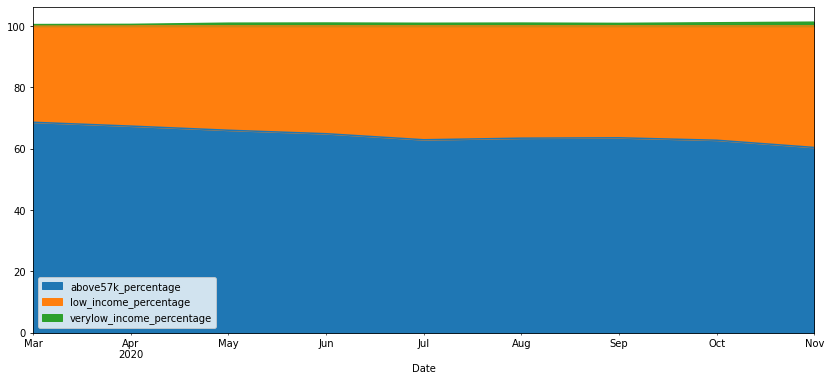

In [43]:
area_chart_claims_df = area_chart_claims_df[['above57k_percentage','low_income_percentage','verylow_income_percentage']] * 100
area_chart_claims_df.plot.area(figsize=(14,6))
plt.show()

## Plot Chart for Texas claims by county and Covid-19 cases

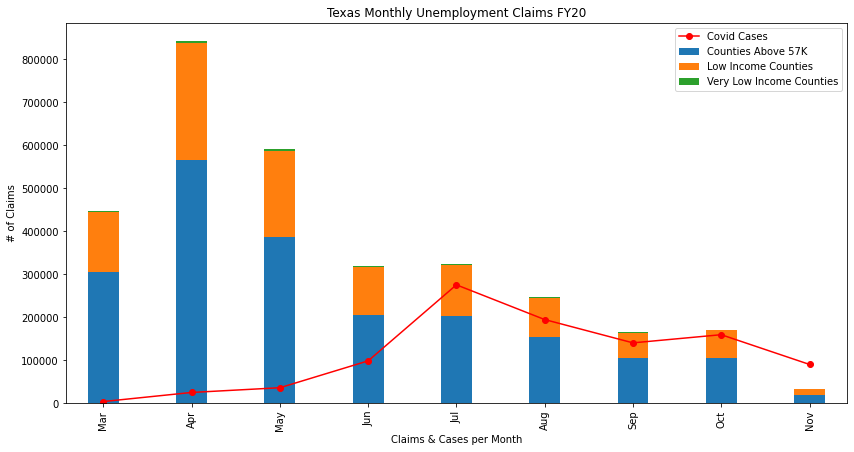

In [44]:
ax1 = cumulative_numbers_df.plot(kind='line',color='red', marker='o')
ax2 = total_claims_per_month_df.plot(kind='bar', stacked=True, width=.35, figsize=(14,7),ax=ax1)

ax2.set_title('Texas Monthly Unemployment Claims FY20')
ax2.legend(['Covid Cases','Counties Above 57K', 'Low Income Counties','Very Low Income Counties'])
ax2.set_xlabel('Claims & Cases per Month')
ax2.set_ylabel('# of Claims')
ax2 = ax2.set_xticklabels(date)


## Jazlyn Section

In [45]:
date_list = combined_low_income_covidcases.index.unique()
cumulative_numbers_cases_lowIncome = []
cumulative_numbers_cases_lowIncome.append(combined_low_income_covidcases.loc['2020-03-31']['cumulative_cases_per_100_000'].sum())
for d in range(len(date_list)-1):
    cumulative_numbers_cases_lowIncome.append((combined_low_income_covidcases.loc[date_list[d+1]]['cumulative_cases_per_100_000'].sum()) - (combined_low_income_covidcases.loc[date_list[d]]['cumulative_cases_per_100_000'].sum()))
cumulative_numbers_cases_lowIncome_df = pd.DataFrame(cumulative_numbers_cases_lowIncome)
print(cumulative_numbers_cases_lowIncome)

[1181.54, 12224.95, 23135.59, 43316.81999999999, 157087.15, 101562.10999999999, 85243.88999999996, 121405.17000000004, 68570.52000000002]


In [46]:
date_list = combined_very_low_income_covidcases.index.unique()
cumulative_numbers_cases_verylowIncome = []
cumulative_numbers_cases_verylowIncome.append(combined_very_low_income_covidcases.loc['2020-03-31']['cumulative_cases_per_100_000'].sum())
for d in range(len(date_list)-1):
    cumulative_numbers_cases_verylowIncome.append((combined_very_low_income_covidcases.loc[date_list[d+1]]['cumulative_cases_per_100_000'].sum()) - (combined_very_low_income_covidcases.loc[date_list[d]]['cumulative_cases_per_100_000'].sum()))
cumulative_numbers_cases_verylowIncome_df = pd.DataFrame(cumulative_numbers_cases_verylowIncome)
print(cumulative_numbers_cases_verylowIncome)

[14.05, 189.7, 397.8799999999999, 2829.4300000000003, 11462.72, 9862.36, 8645.410000000003, 6226.93, 2162.8899999999994]


In [47]:
date_list = combined_above57k_income_covidcases.index.unique()
cumulative_numbers_cases_above57kIncome = []
cumulative_numbers_cases_above57kIncome.append(combined_above57k_income_covidcases.loc['2020-03-31']['cumulative_cases_per_100_000'].sum())
for d in range(len(date_list)-1):
    cumulative_numbers_cases_above57kIncome.append((combined_above57k_income_covidcases.loc[date_list[d+1]]['cumulative_cases_per_100_000'].sum()) - (combined_above57k_income_covidcases.loc[date_list[d]]['cumulative_cases_per_100_000'].sum()))
cumulative_numbers_cases_above57kIncome_df = pd.DataFrame(cumulative_numbers_cases_above57kIncome)
print(cumulative_numbers_cases_above57kIncome)

[461.16, 3689.0200000000004, 4272.33, 12615.97, 35609.03000000001, 27225.04999999999, 20307.70000000001, 28226.25, 15225.659999999974]


In [48]:
chart_bar_df = pd.DataFrame({'Very Low Income':cumulative_numbers_cases_verylowIncome,'Low Income':cumulative_numbers_cases_lowIncome, 'Income Above 57k':cumulative_numbers_cases_above57kIncome}, index=date)

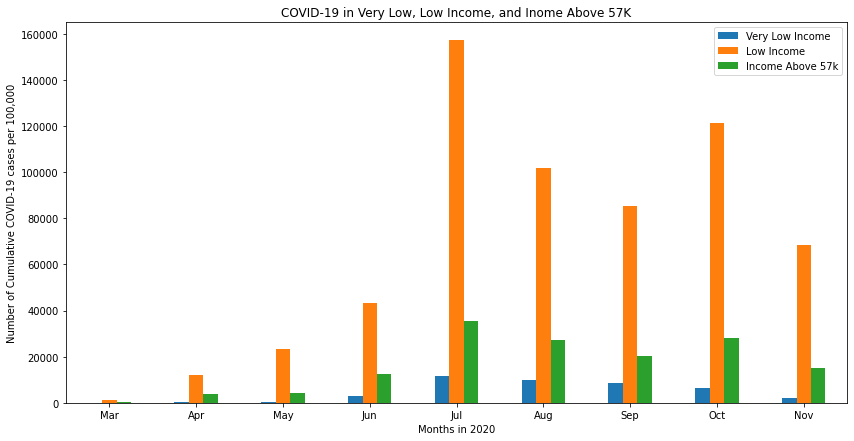

In [49]:
ax = chart_bar_df.plot.bar(rot=0,figsize=(14,7))
ax.set_ylabel('Number of Cumulative COVID-19 cases per 100,000')
ax.set_xlabel('Months in 2020')
ax.set_title('COVID-19 in Very Low, Low Income, and Inome Above 57K')

plt.show()

## Niguel Section

In [50]:
urbanization_groupby = Texas_ConfirmedByCounty_Covid.groupby('NCHS_urbanization')

In [51]:
urbanization_df = pd.DataFrame(urbanization_groupby['confirmed'].sum())
urbanization_df.index.names = ['']
urbanization_df.columns.names = ['']
urbanization_df['deaths'] = urbanization_groupby['deaths'].sum().values
urbanization_df.head()

,confirmed,deaths
,,
Large central metro,514935,7560
Large fringe metro,147628,2361
Medium metro,275041,6146
Micropolitan,68296,2037
Non-core,45766,1324


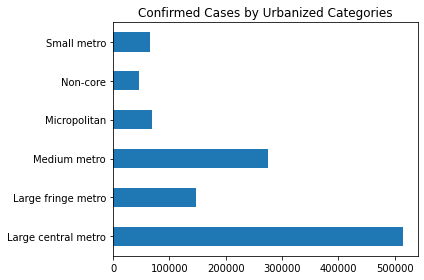

In [52]:
# Confirmed Cases by Urbanized Category
urbanization_df['confirmed'].plot(kind='barh')
plt.title("Confirmed Cases by Urbanized Categories")
plt.tight_layout()
plt.show()

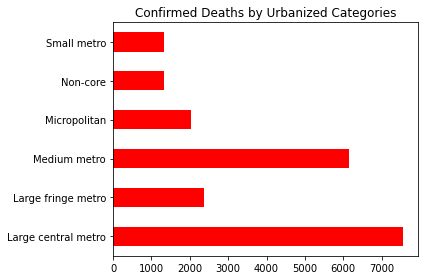

In [53]:
# Confirmed Deaths by Urbanized Category
urbanization_df['deaths'].plot(kind='barh',color='red')
plt.title("Confirmed Deaths by Urbanized Categories")
plt.tight_layout()
plt.show()

In [54]:
# Get Correlation between Cases and Deaths based a Groupby on Urban Categories
urbanization_df.corr()

,confirmed,deaths
,,
confirmed,1.000000,0.959011
deaths,0.959011,1.000000


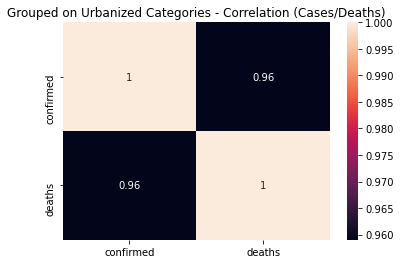

In [55]:
# Charting the matrix for Cases and Deaths based a Groupby on Urban Categories
matrix = urbanization_df.corr()
sn.heatmap(matrix, annot=True)
plt.title('Grouped on Urbanized Categories - Correlation (Cases/Deaths)')
plt.show()

In [56]:
# Added Population into the DataFrame w/ Cases & Deaths for correlation
pop_cases_deaths_df = Texas_ConfirmedByCounty_Covid.loc[1:,['total_population','confirmed','deaths']]
pop_cases_deaths_df.corr()

,total_population,confirmed,deaths
total_population,1.000000,0.971583,0.898744
confirmed,0.971583,1.000000,0.917657
deaths,0.898744,0.917657,1.000000


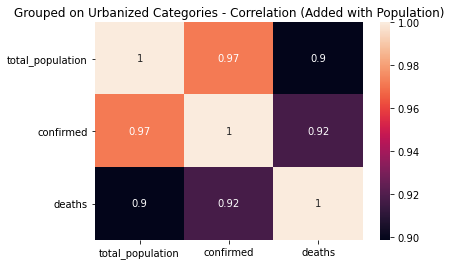

In [57]:
# Charting the matrix with total population based a Groupby on Urban Categories
matrix_2 = pop_cases_deaths_df.corr()
plt.title('Grouped on Urbanized Categories - Correlation (Added with Population)')
sn.heatmap(matrix_2 , annot=True)
plt.show()

In [58]:
Texas_ConfirmedByCounty_Covid.head()

,last_update,county_name,lat,lon,NCHS_urbanization,total_population,confirmed,confirmed_per_100000,deaths,deaths_per_100000
2599,2020-11-21 14:25:36 UTC,Anderson,31.815347,-95.653548,Micropolitan,57863.0,3092,5343.66,46,79.50
2600,2020-11-21 14:25:36 UTC,Andrews,32.304686,-102.637655,Micropolitan,17818.0,940,5275.56,13,72.96
2601,2020-11-21 14:25:36 UTC,Angelina,31.254573,-94.609015,Micropolitan,87607.0,2515,2870.78,97,110.72
2602,2020-11-21 14:25:36 UTC,Aransas,28.105562,-96.999505,Medium metro,24763.0,376,1518.39,18,72.69
2603,2020-11-21 14:25:36 UTC,Archer,33.615700,-98.687546,Small metro,8789.0,227,2582.77,2,22.76


# API Call and Display of Heat Map showing "Confirmed" cases hot zones in Texas 

In [62]:
locations = Texas_ConfirmedByCounty_Covid[['lat','lon']]
confirmed = Texas_ConfirmedByCounty_Covid['confirmed']

In [64]:
zero_coor = (31.81,-95.65)
figure_layout = {'width': '1050px', 'margin': '0 auto 0 auto'}
# Plot Heatmap
fig = gmaps.figure(center=zero_coor,zoom_level=5.5,layout=figure_layout,map_type="TERRAIN")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=confirmed,
                                 dissipating=False, max_intensity=.5,
                                 point_radius=.5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px', margin='0 auto 0 auto', width='1050px'))

In [61]:
#%reset

Nothing done.
